# **Final Project Task 2 - Census EDA**

Requirements

- Analyze hours-per-week Target Distribution **1p**
    - Provide visualizations like histograms or density plots for hours-per-week to assess its distribution, outliers, and skewness.

- Provide a summary of the dataset using descriptive statistics, such as mean, median, and standard deviation. **1p**

- Check for missing values and report the number and percentage of missing data for each column. **1p**

- Identify outliers in at least one numerical column using boxplots. **1p**

- Write a summary report of your findings from the EDA, highlighting key patterns or trends, unexpected insights or anomalies, and areas requiring further investigation. **1p**


- Plot histograms for at least three numerical columns and discuss their distributions, such as skewness and modality. - Optional

- Generate bar plots for at least three categorical columns and discuss the frequency distributions. - Optional

- Create a correlation matrix for target hours-per-week and the rest of numerical variables and discuss the strongest and weakest correlations with the target. - Optional

- Explore relationships between at least one numerical variable and hours-per-week target using scatter plots and identify any visible trends. Choose the variable that is/are most correlated with hours-per-week. - Optional

- Analyze the relationship between hours-per-week and all categorical variable using boxplots or violin plots. - Optional

- At the end, do the same analysis for the preprocessed dataset (just change the input data in the EDA), and write a report. - Optional

- Others? - Optional


Deliverable:

- Notebook code with no errors.
- Include all visuals from the requirements in the notebook: graphs, plots, histograms, heatmap etc
- Be sure to discuss the findings and add a summary report

In [2]:
import pandas as pd

In [3]:
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]

data = pd.read_csv(data_url, header=None, names=columns, na_values=" ?", skipinitialspace=True)
data.sample(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
16573,30,Private,174215,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,15,United-States,<=50K
22268,69,Private,125437,HS-grad,9,Divorced,Other-service,Not-in-family,White,Female,0,0,32,United-States,<=50K
1035,19,?,241616,HS-grad,9,Never-married,?,Unmarried,White,Male,0,2001,40,United-States,<=50K
26620,42,Federal-gov,272625,Assoc-voc,11,Divorced,Adm-clerical,Unmarried,Black,Female,0,0,40,United-States,>50K
32112,32,Self-emp-inc,209691,Bachelors,13,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,50,Canada,<=50K
21860,51,Self-emp-not-inc,306784,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,30,United-States,<=50K
12577,28,Self-emp-not-inc,70100,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,60,United-States,<=50K
11570,17,Private,197732,11th,7,Never-married,Other-service,Own-child,White,Female,0,0,12,United-States,<=50K
4094,21,Private,260617,10th,6,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,36,United-States,<=50K
22673,18,Private,167979,11th,7,Never-married,Sales,Own-child,White,Male,0,0,15,United-States,<=50K


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [5]:
target_col = 'hours-per-week'
numerical_cols = data.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()



numerical_cols = [col for col in numerical_cols if col != 'fnlwgt']

In [6]:
#target distribution

print('TARGET DISTRIBUTION')

print(f"Statistici {target_col}:")
print(f"Mean: {data[target_col].mean():.2f}")
print(f"Median: {data[target_col].median():.2f}")
print(f"Std: {data[target_col].std():.2f}")
print(f"Min: {data[target_col].min():.2f}")
print(f"Max: {data[target_col].max():.2f}")
print(f"Skewness: {data[target_col].skew():.2f}")
print()


TARGET DISTRIBUTION
Statistici hours-per-week:
Mean: 40.44
Median: 40.00
Std: 12.35
Min: 1.00
Max: 99.00
Skewness: 0.23



Grafice target distribution
1. Histrograma
2. Density plot
3. Boxplot
4. QQ Plot


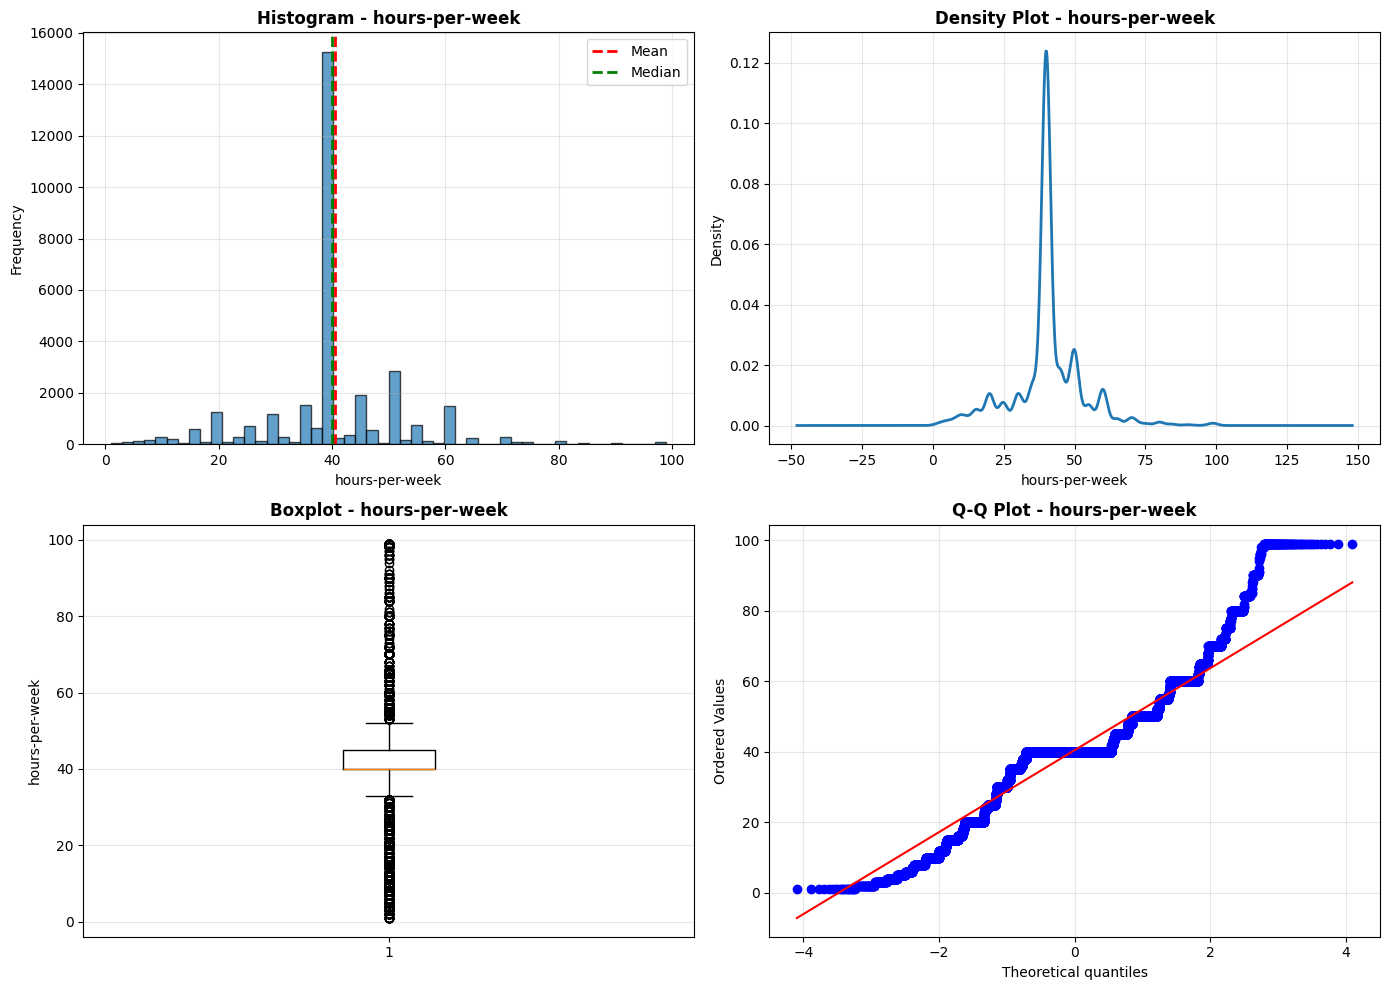

In [7]:

print('Grafice target distribution')

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

print('1. Histrograma')
axes[0, 0].hist(data[target_col].dropna(), bins=50, edgecolor='black', alpha=0.7)
axes[0, 0].axvline(data[target_col].mean(), color='red', linestyle='--', linewidth=2, label='Mean')
axes[0, 0].axvline(data[target_col].median(), color='green', linestyle='--', linewidth=2, label='Median')
axes[0, 0].set_title(f'Histogram - {target_col}', fontweight='bold')
axes[0, 0].set_xlabel(target_col)
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)


print('2. Density plot')
data[target_col].dropna().plot(kind='density', ax=axes[0, 1], linewidth=2)
axes[0, 1].set_title(f'Density Plot - {target_col}', fontweight='bold')
axes[0, 1].set_xlabel(target_col)
axes[0, 1].grid(True, alpha=0.3)


print('3. Boxplot')
axes[1, 0].boxplot(data[target_col].dropna())
axes[1, 0].set_title(f'Boxplot - {target_col}', fontweight='bold')
axes[1, 0].set_ylabel(target_col)
axes[1, 0].grid(True, alpha=0.3, axis='y')


print('4. QQ Plot')
stats.probplot(data[target_col].dropna(), dist="norm", plot=axes[1, 1])
axes[1, 1].set_title(f'Q-Q Plot - {target_col}', fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('target_distribution.png', dpi=300, bbox_inches='tight')
plt.show()


In [8]:
#DESCRIPTIVE STATISTICS

stats_df = data[numerical_cols].describe().T
stats_df['skewness'] = data[numerical_cols].skew()
print(stats_df.to_string())

                  count         mean          std   min   25%   50%   75%      max   skewness
age             32561.0    38.581647    13.640433  17.0  28.0  37.0  48.0     90.0   0.558743
education-num   32561.0    10.080679     2.572720   1.0   9.0  10.0  12.0     16.0  -0.311676
capital-gain    32561.0  1077.648844  7385.292085   0.0   0.0   0.0   0.0  99999.0  11.953848
capital-loss    32561.0    87.303830   402.960219   0.0   0.0   0.0   0.0   4356.0   4.594629
hours-per-week  32561.0    40.437456    12.347429   1.0  40.0  40.0  45.0     99.0   0.227643


3 coloane cu missing values ('?'):
        Column  Missing_Count  Missing_Pct
    occupation           1843     5.660146
     workclass           1836     5.638647
native-country            583     1.790486


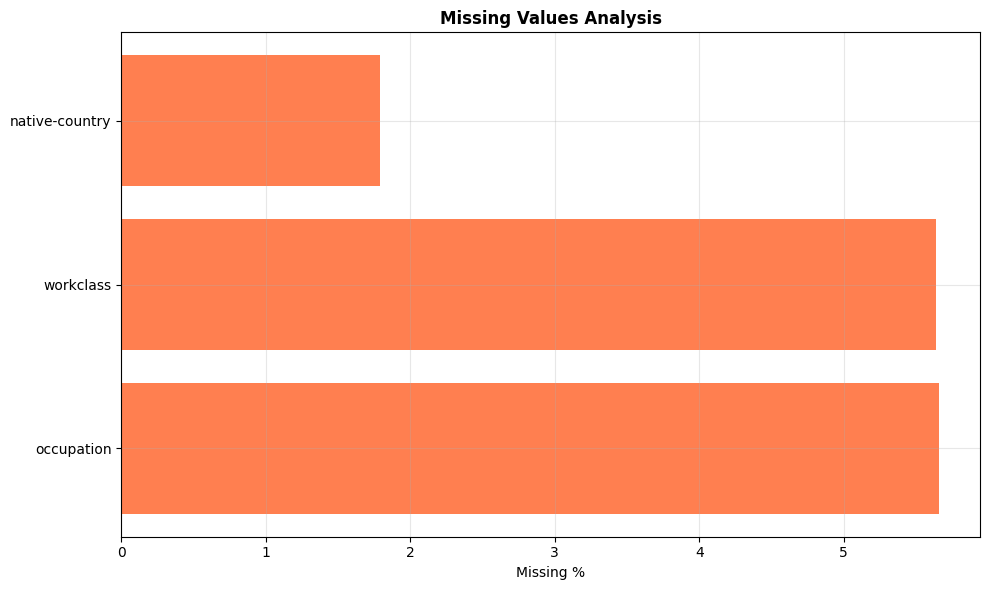

In [9]:
#MISSING VALUES 

#verific valorile ? in fiecare coloana

missing = pd.DataFrame({
    'Column': data.columns,
    'Missing_Count': [(data[col] == '?').sum() for col in data.columns],
    'Missing_Pct': [((data[col] == '?').sum() / len(data)) * 100 for col in data.columns]
})
missing = missing[missing['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

if len(missing) == 0:
    print("NU EXISTA MISSING VALUES!")
else:
    print(f"{len(missing)} coloane cu missing values ('?'):")
    print(missing.to_string(index=False))
    
    # Viz
    plt.figure(figsize=(10, max(6, len(missing) * 0.4)))
    plt.barh(missing['Column'], missing['Missing_Pct'], color='coral')
    plt.xlabel('Missing %')
    plt.title('Missing Values Analysis', fontweight='bold')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('missing_values.png', dpi=300, bbox_inches='tight')
    plt.show()



In [10]:
#OUTLIERS DETECTION WITH IQR

outlier_data = []
for col in numerical_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    n_out = len(data[(data[col] < lower) | (data[col] > upper)])
    pct_out = (n_out / len(data)) * 100
    
    outlier_data.append({
        'Column': col,
        'N_Outliers': n_out,
        'Pct_Outliers': pct_out
    })
    
    print(f"{col}: {n_out} outlieri ({pct_out:.2f}%)")

print()

age: 143 outlieri (0.44%)
education-num: 1198 outlieri (3.68%)
capital-gain: 2712 outlieri (8.33%)
capital-loss: 1519 outlieri (4.67%)
hours-per-week: 9008 outlieri (27.66%)



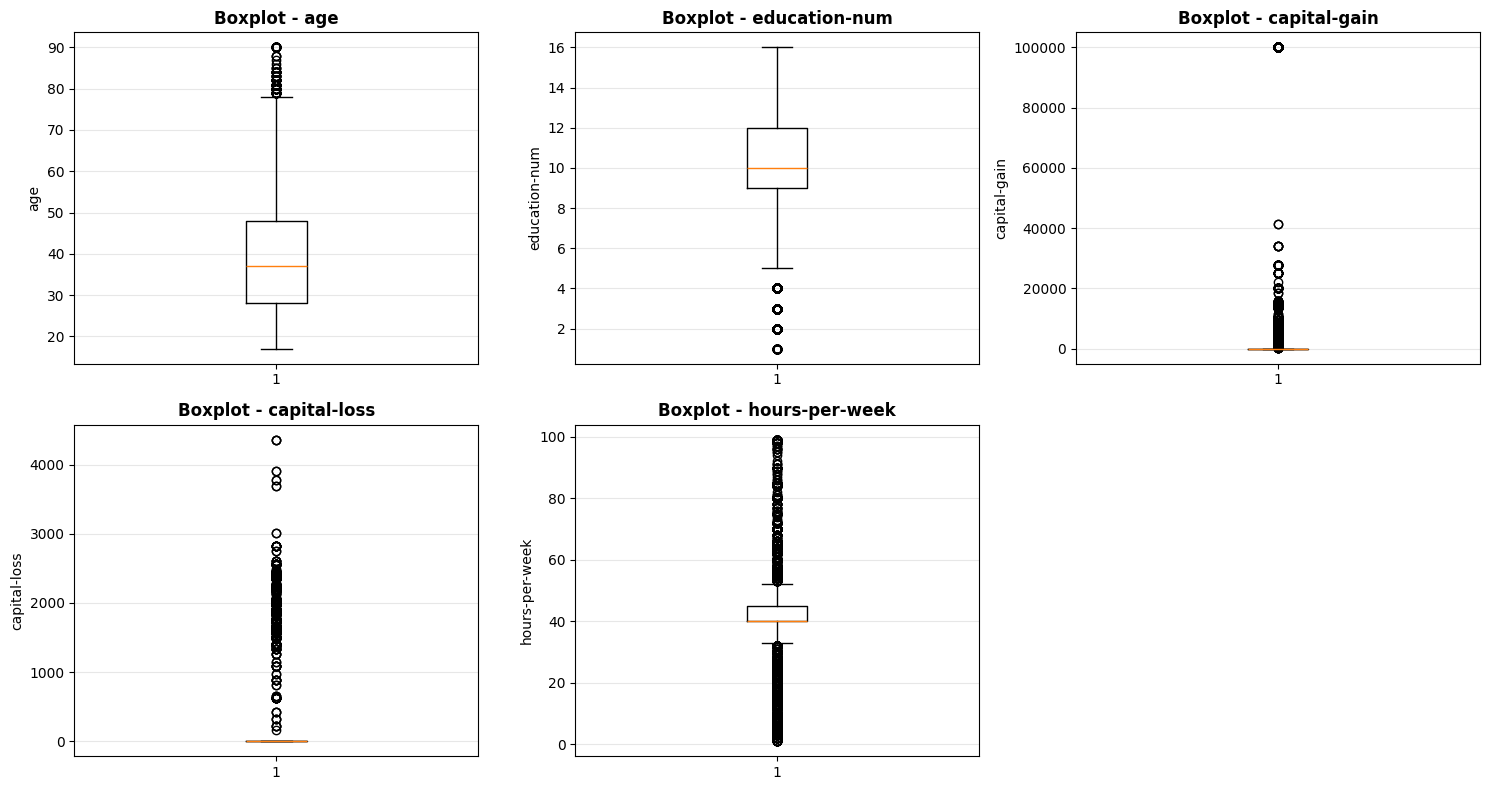

In [11]:

# Boxplots
n_cols = len(numerical_cols)
n_rows = (n_cols + 2) // 3
fig, axes = plt.subplots(n_rows, 3, figsize=(15, n_rows * 4))
axes = axes.flatten() if n_cols > 1 else [axes]

for idx, col in enumerate(numerical_cols):
    axes[idx].boxplot(data[col].dropna())
    axes[idx].set_ylabel(col)
    axes[idx].set_title(f'Boxplot - {col}', fontweight='bold')
    axes[idx].grid(True, alpha=0.3, axis='y')

for idx in range(n_cols, len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.savefig('outliers_boxplots.png', dpi=300, bbox_inches='tight')
plt.show()

In [12]:
numerical_cols_no_target = [col for col in numerical_cols if col != target_col]

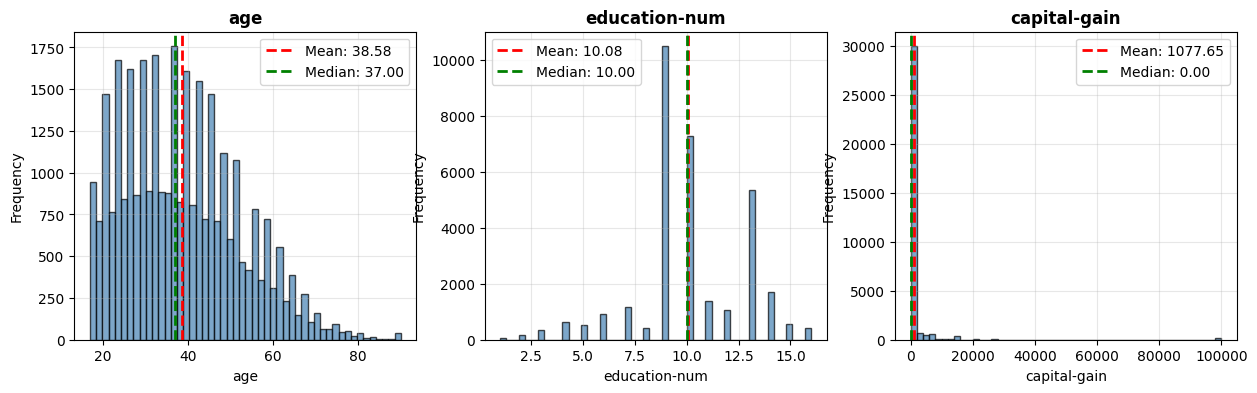

In [13]:
#HISTROGRAM FOR 3 NUMERICAL COLUMNS

cols_to_plot = numerical_cols_no_target[:min(3, len(numerical_cols_no_target))]

fig, axes = plt.subplots(1, len(cols_to_plot), figsize=(15, 4))
if len(cols_to_plot) == 1:
    axes = [axes]

for idx, col in enumerate(cols_to_plot):

    # Histogram
    axes[idx].hist(data[col].dropna(), bins=50, edgecolor='black', alpha=0.7, color='steelblue')
    axes[idx].axvline(data[col].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {data[col].mean():.2f}')
    axes[idx].axvline(data[col].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {data[col].median():.2f}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')
    axes[idx].set_title(f'{col}', fontweight='bold')
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)
    
    # statistici
    skewness = data[col].skew()
    

    

In [14]:
for col in cols_to_plot:
    skew = data[col].skew()
    mean_val = data[col].mean()
    median_val = data[col].median()
    
    print(f"{col}:")
    print(f" Skewness: {skew:.2f}")
    
    if abs(skew) < 0.5:
        print(f"  Distributie aproximativ SIMETRICA")
    elif skew > 0.5:
        print(f"  Distributie RIGHT-SKEWED (asimetrica dreapta)")
        print(f"   -> Tail spre valori mari, multe valori mici")
    else:
        print(f"  Distributie LEFT-SKEWED (asimetrică stanga)")
        print(f"   -> Tail spre valori mici, multe valori mari")
    
    if abs(mean_val - median_val) / mean_val > 0.1:
        print(f"  Mean ({mean_val:.2f}) - Median ({median_val:.2f}) -> prezenta outlierilor")
    else:
        print(f" Distributie echilibrata")
    
    print()


    

age:
 Skewness: 0.56
  Distributie RIGHT-SKEWED (asimetrica dreapta)
   -> Tail spre valori mari, multe valori mici
 Distributie echilibrata

education-num:
 Skewness: -0.31
  Distributie aproximativ SIMETRICA
 Distributie echilibrata

capital-gain:
 Skewness: 11.95
  Distributie RIGHT-SKEWED (asimetrica dreapta)
   -> Tail spre valori mari, multe valori mici
  Mean (1077.65) - Median (0.00) -> prezenta outlierilor



### age: right skewed (asimetrica dreapta), majoritatea oamenilor au 30-40 ani, distributia normala usor deplasata spre dreapta (cazuri de oameni mai in varsta)
### education-num: distributie echilibrata, peak = 10 clase.
### capital-gain: distributie FOARTE asimetrica (right skewed), aproape tot = 0 -> majoritatea oamenilor nu au castig de capital

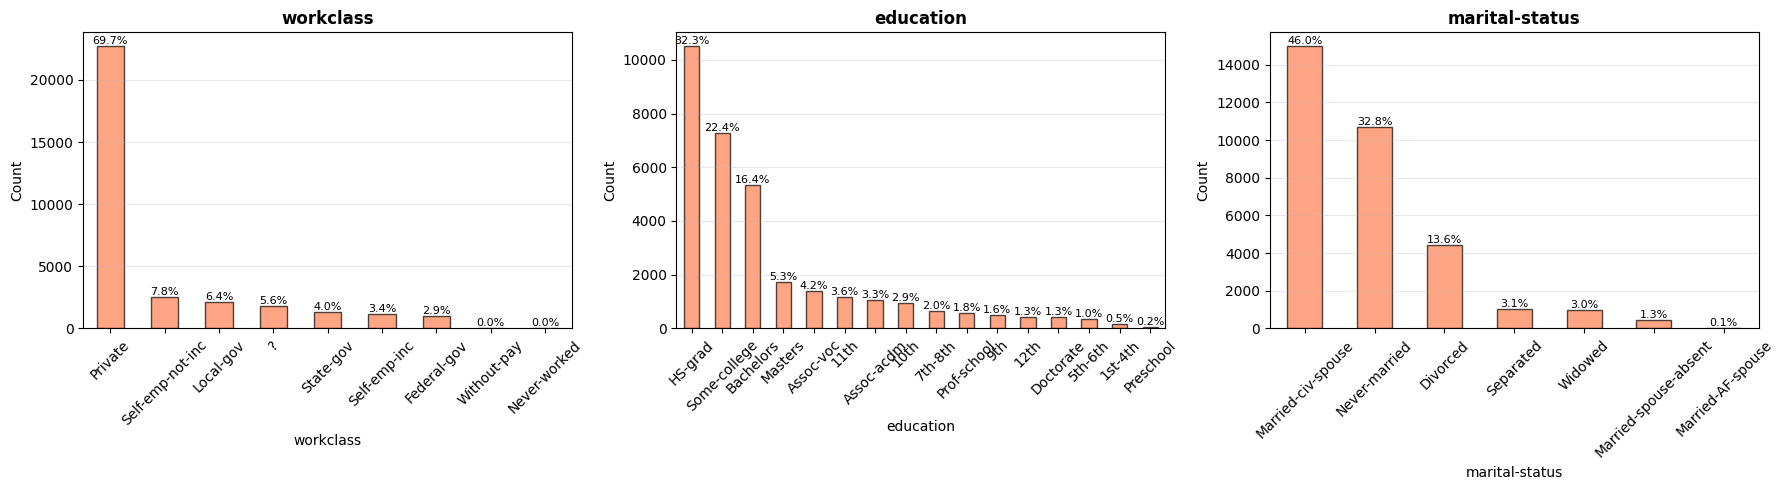

In [15]:
cat_cols_to_plot = categorical_cols[:min(3, len(categorical_cols))]

fig, axes = plt.subplots(1, len(cat_cols_to_plot), figsize=(18, 5))
if len(cat_cols_to_plot) == 1:
    axes = [axes]

for idx, col in enumerate(cat_cols_to_plot):
    # Frecvente
    value_counts = data[col].value_counts()
    
    # Bar plot
    value_counts.plot(kind='bar', ax=axes[idx], color='coral', edgecolor='black', alpha=0.7)
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Count')
    axes[idx].set_title(f'{col}', fontweight='bold')
    axes[idx].grid(True, alpha=0.3, axis='y')
    axes[idx].tick_params(axis='x', rotation=45)
    
    # procente
    total = len(data[col])
    for i, (category, count) in enumerate(value_counts.items()):
        pct = (count / total) * 100
        axes[idx].text(i, count, f'{pct:.1f}%', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.savefig('barplots_categorical.png', dpi=300, bbox_inches='tight')
plt.show()

In [16]:
for col in cat_cols_to_plot:
    value_counts = data[col].value_counts()
    total = len(data[col])
    
    print(f"{col}:")
    print(f" Total categorii: {len(value_counts)}")
    print(f" Top 3 categorii:")
    for i, (category, count) in enumerate(value_counts.head(3).items()):
        pct = (count / total) * 100
        print(f"     {i+1}. {category}: {count:,} ({pct:.1f}%)")
    
    # Analiză balans
    top_pct = (value_counts.iloc[0] / total) * 100
    if top_pct > 70:
        print(f"   Distributie FOARTE IMBALANSATA (top categorie: {top_pct:.1f}%)")
    elif top_pct > 50:
        print(f"   Distributie IMBALANSATA (top categorie: {top_pct:.1f}%)")
    else:
        print(f"  Distributie relativ ECHILIBRATA")
    
    print()




workclass:
 Total categorii: 9
 Top 3 categorii:
     1. Private: 22,696 (69.7%)
     2. Self-emp-not-inc: 2,541 (7.8%)
     3. Local-gov: 2,093 (6.4%)
   Distributie IMBALANSATA (top categorie: 69.7%)

education:
 Total categorii: 16
 Top 3 categorii:
     1. HS-grad: 10,501 (32.3%)
     2. Some-college: 7,291 (22.4%)
     3. Bachelors: 5,355 (16.4%)
  Distributie relativ ECHILIBRATA

marital-status:
 Total categorii: 7
 Top 3 categorii:
     1. Married-civ-spouse: 14,976 (46.0%)
     2. Never-married: 10,683 (32.8%)
     3. Divorced: 4,443 (13.6%)
  Distributie relativ ECHILIBRATA



### workclass - distributie foarte imbalansata, clasa Private acopera 69.7% (putem avea risc de overfitting, pentru ca modelul va invata majoritar pattern-urile pentru angajatii privati)
#### education - distributie relativ echilibrata, dar sunt 16 clase -> multe features (in task-ul 1 am ales sa inlocuiesc acest feature cu unul nou rezultat din education-num)
### marital-status - distributie relativ echilibrata, cei casatoriti reprezinta 46%, 7 clase - decent pentru OHE

In [17]:
#matrice de corelatie
corr_matrix = data[numerical_cols].corr()

# corelatii cu target
target_correlations = corr_matrix[target_col].drop(target_col).sort_values(ascending=False)

print(f"CORELATII CU TARGET ({target_col}):")
print()
print(target_correlations.to_string())
print()

#cele mai puternice/slabe corelatii
strongest_positive = target_correlations.idxmax()
strongest_positive_val = target_correlations.max()


negative_corrs = target_correlations[target_correlations < 0]
if len(negative_corrs) > 0:
    strongest_negative = negative_corrs.idxmin()
    strongest_negative_val = negative_corrs.min()
else:
    strongest_negative = None
    strongest_negative_val = None

weakest = target_correlations.abs().idxmin()
weakest_val = target_correlations[weakest]


# REZULTATE

print(f"CEA MAI PUTERNICA CORELATIE POZITIVA:")
print(f"-> {strongest_positive} <-> {target_col}: {strongest_positive_val:.3f}")
if abs(strongest_positive_val) > 0.7:
    strength = "FOARTE PUTERNICA"
elif abs(strongest_positive_val) > 0.5:
    strength = "PUTERNICA"
elif abs(strongest_positive_val) > 0.3:
    strength = "MODERATA"
else:
    strength = "SLABA"
print(f"-> Putere: {strength}")
print()

if strongest_negative is not None:
    print(f"CEA MAI PUTERNICA CORELATIE NEGATIVA:")
    print(f" {strongest_negative} <-> {target_col}: {strongest_negative_val:.3f}")
    print()
else:
    print(f"NU EXISTA CORELATII NEGATIVE")
    print(f"Toate variabilele numerice au corelatii pozitive cu {target_col}")
    print(f"-> dar majoritatea sunt FOARTE SLABE (aproape de 0)")
    print()

print(f"CEA MAI SLABA CORELATIE (aproape independente):")
print(f"{weakest} <-> {target_col}: {weakest_val:.3f}")
print(f"Interpretare: {weakest} și {target_col} sunt aproape independente")
print(f"-> Relatia este practic INEXISTENTA (corelație aproape de 0)")
print()


max_abs_corr = target_correlations.abs().max()
if max_abs_corr < 0.3:
    print(f" TOATE corelatiile sunt SLABE (max: {max_abs_corr:.3f})")
    print(f"-> Relatiile liniare intre features numerice si target sunt MINIME")
    print(f"-> Probabil relatiile sunt NON-LINIARE / mediate de variabile categorice")
elif max_abs_corr < 0.5:
    print(f" Corelatiile sunt MODERATE (max: {max_abs_corr:.3f})")
    print(f"-> Exista relatii liniare slabe-moderate")
else:
    print(f" Exista corelatii PUTERNICE (max: {max_abs_corr:.3f})")
    print(f"-> Features numerice au relatii liniare semnificative cu target-ul")
print()

CORELATII CU TARGET (hours-per-week):

education-num    0.148123
capital-gain     0.078409
age              0.068756
capital-loss     0.054256

CEA MAI PUTERNICA CORELATIE POZITIVA:
-> education-num <-> hours-per-week: 0.148
-> Putere: SLABA

NU EXISTA CORELATII NEGATIVE
Toate variabilele numerice au corelatii pozitive cu hours-per-week
-> dar majoritatea sunt FOARTE SLABE (aproape de 0)

CEA MAI SLABA CORELATIE (aproape independente):
capital-loss <-> hours-per-week: 0.054
Interpretare: capital-loss și hours-per-week sunt aproape independente
-> Relatia este practic INEXISTENTA (corelație aproape de 0)

 TOATE corelatiile sunt SLABE (max: 0.148)
-> Relatiile liniare intre features numerice si target sunt MINIME
-> Probabil relatiile sunt NON-LINIARE / mediate de variabile categorice



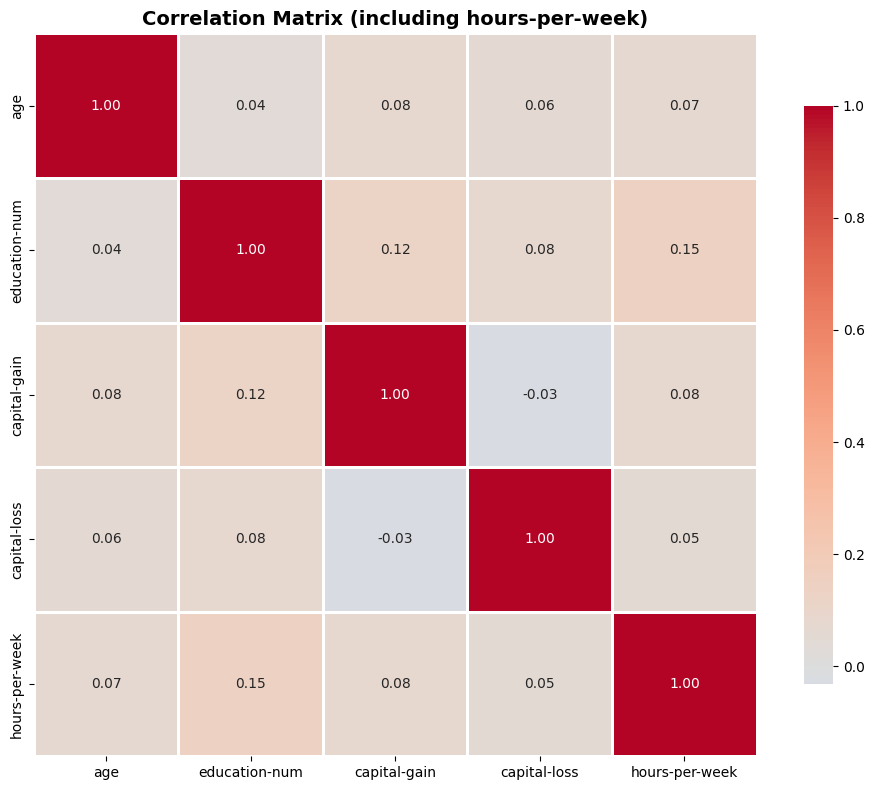

In [18]:
# HEATMAP
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title(f'Correlation Matrix (including {target_col})', fontweight='bold', fontsize=14)
plt.tight_layout()
plt.savefig('correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

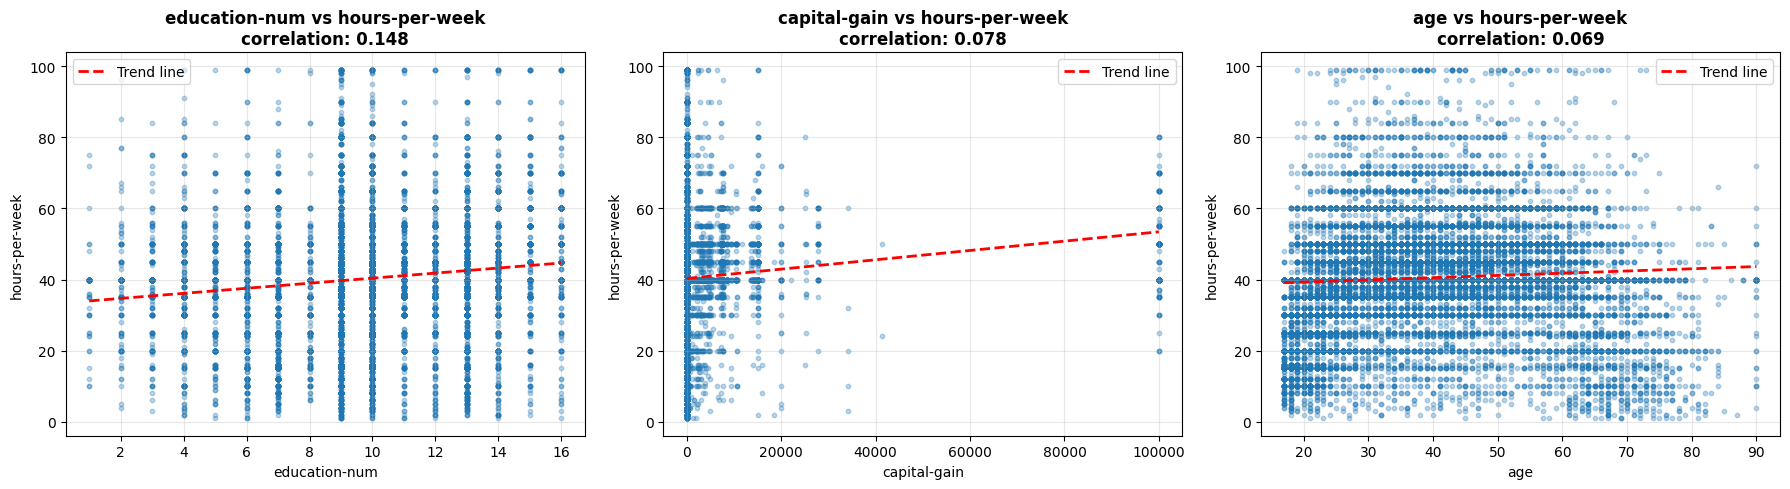

In [19]:
#TOP 3 CORELATII
top_corr_vars = target_correlations.abs().nlargest(3).index.tolist()

fig, axes = plt.subplots(1, len(top_corr_vars), figsize=(18, 5))
if len(top_corr_vars) == 1:
    axes = [axes]

for idx, var in enumerate(top_corr_vars):
    # Scatter plot
    axes[idx].scatter(data[var], data[target_col], alpha=0.3, s=10)
    axes[idx].set_xlabel(var)
    axes[idx].set_ylabel(target_col)
    axes[idx].set_title(f'{var} vs {target_col}\ncorrelation: {target_correlations[var]:.3f}', 
                        fontweight='bold')
    axes[idx].grid(True, alpha=0.3)
    
    z = np.polyfit(data[var].dropna(), data[target_col].dropna(), 1)
    p = np.poly1d(z)
    x_line = np.linspace(data[var].min(), data[var].max(), 100)
    axes[idx].plot(x_line, p(x_line), "r--", linewidth=2, label='Trend line')
    axes[idx].legend()

plt.tight_layout()
plt.savefig('scatter_plots_top_correlations.png', dpi=300, bbox_inches='tight')
plt.show()



# TOP 3 CORELATII CU TARGET (hours-per-week)

### Am ales top 3 variabile cu cea mai puternica corelatie cu hours-per-week. Asa cum reiese din grafice, cea mai puternica corelatie (relativ) este cu variabila education-num (0.148). Cu toate acestea, relatia ramane slaba (mult sub 0.5, apropiata mai degraba de 0). Pentru variabilele capital-gain si age nu identificam aproape niciun pattern clar (aproape inexistent). Aici poate variabilele categorice (workclass, occupation) vor fi mult mai predictive pentru hours-per-week. 

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12924\2707729053.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_clean, x=cat_col, y=target_col, order=order,
C:\Users\ASUS\AppData\Local\Temp\ipykernel_12924\2707729053.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_clean, x=cat_col, y=target_col, order=order,
C:\Users\ASUS\AppData\Local\Temp\ipykernel_12924\2707729053.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_clean, x=cat_col, y=target_col, order=order,
C:\Users\ASUS\AppData\Local\Temp\ipykernel_

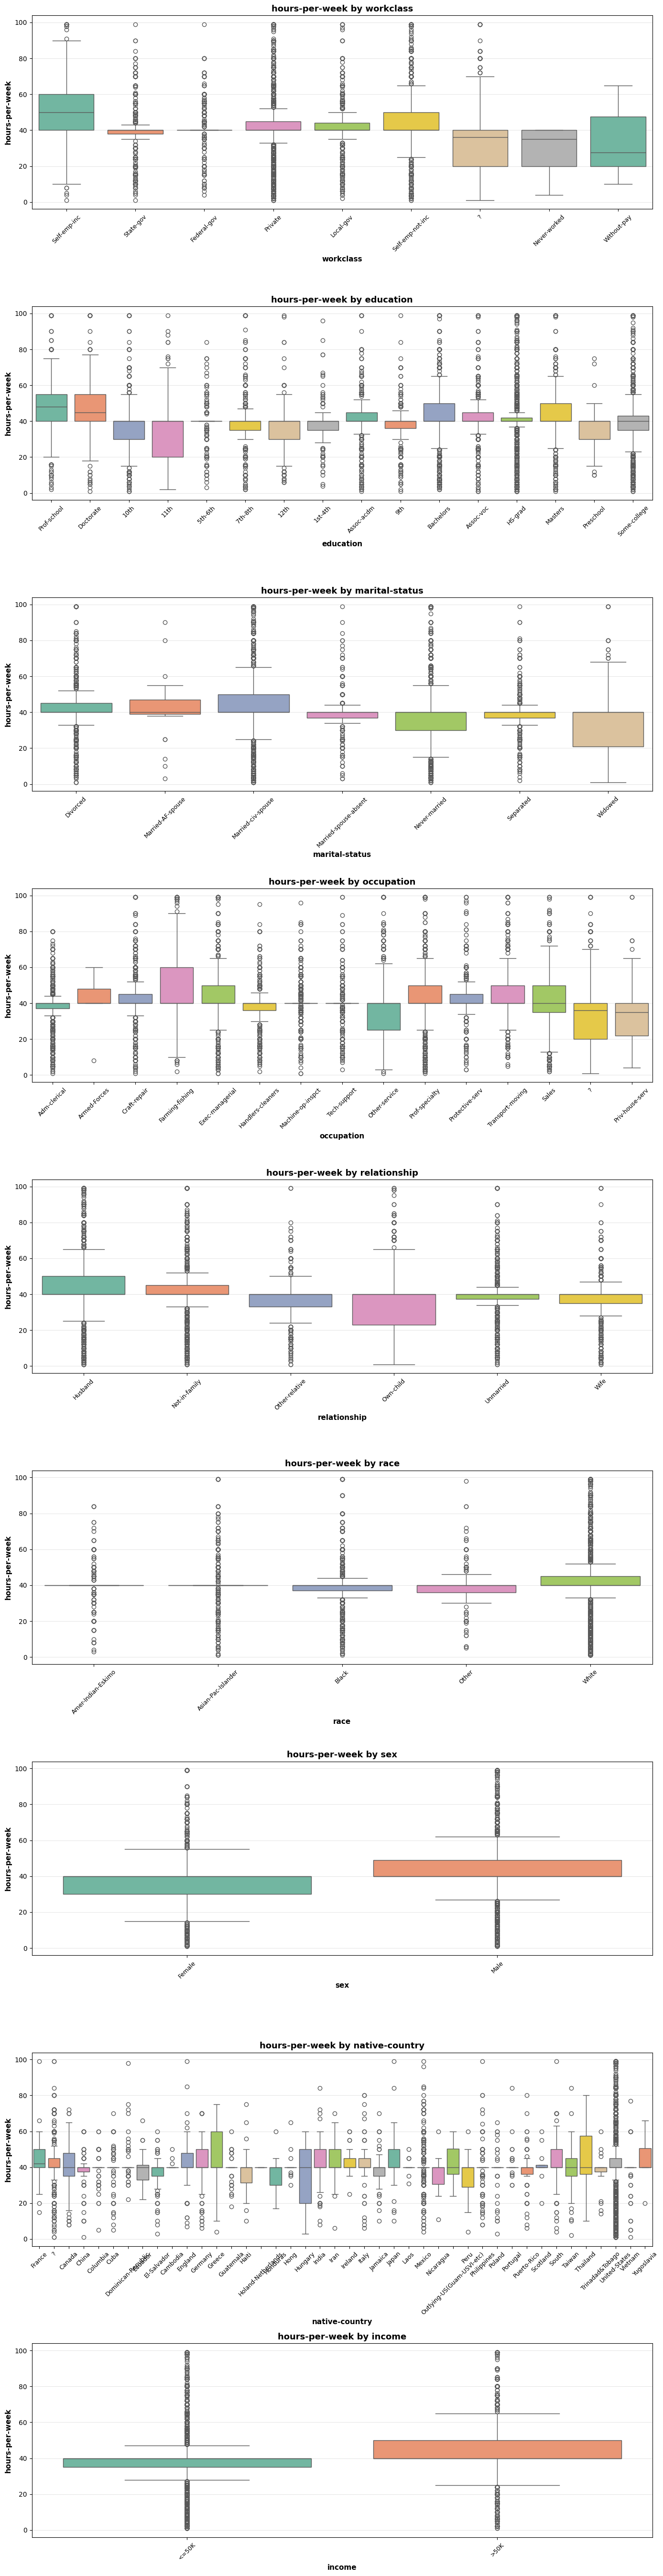

In [20]:

cat_for_analysis = categorical_cols 

fig, axes = plt.subplots(len(cat_for_analysis), 1, figsize=(14, 6 * len(cat_for_analysis)))
if len(cat_for_analysis) == 1:
    axes = [axes]

for idx, cat_col in enumerate(cat_for_analysis):
    # Boxplot
    data_clean = data[[cat_col, target_col]].dropna()
    
    order = data_clean.groupby(cat_col)[target_col].median().sort_values(ascending=False).index
    
    sns.boxplot(data=data_clean, x=cat_col, y=target_col, order=order, 
                palette='Set2', ax=axes[idx])
    axes[idx].set_xlabel(cat_col, fontweight='bold', fontsize=11)
    axes[idx].set_ylabel(target_col, fontweight='bold', fontsize=11)
    axes[idx].set_title(f'{target_col} by {cat_col}', fontweight='bold', fontsize=13)
    axes[idx].tick_params(axis='x', rotation=45, labelsize=9)
    axes[idx].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('boxplots_target_vs_all_categorical.png', dpi=300, bbox_inches='tight')
plt.show()



# Observatii boxplot variabile categorice

### Cei mai puternici predictori pentru hours-per-week: Occupation (aprox. 30h diferenta, top ore lucrate: Exec-managerial, Prof-specialty si Farming-fishing - ajung undeva la 50h), Workclass (aprox 20h diferenta, cel mai mare numar de ore lucrate - antreprenori - ajunge undeva la 50h) si Education (diferenta 18-20h, top ore lucrate Prof-School, Doctorate, Masters - ajung undeva la 45 de ore lucrate).
### Impact moderat: Marital-status si relationship (diferenta de cca. 10h) -> cei casatoriti/cu familie - tind sa lucreze mai multe ore. 
### Impact slab/inexistent: race, sex, native-country, income.

### Concluzie: Ma gandesc sa elimin din model variabilele cu impact slab. De exemplu, native-country are foarte multe clase, ceea ce ar majora dimensionalitatea modelului; in plus, are un impact mai degraba slab asupra target-ului hours-per-week. Sex si income au doar 2 clase, deci poate ca le-as pastra ca sa experimentez.

# ANALIZE PENTRU DATASETUL PREPROCESAT


### Observatii:
### - am salvat toate cele 3 variante de train si test. Voi face aceasta analiza pe varianta 3, unde folosesc RobustScaling pe variabile numerice si OHE pe cele categorice. 
### - inca am in model predictorii slabi ca native-country, sex, income, race  -> voi vedea acum ce rezultate am


In [22]:
#incarc datele

train_prep_v3 = pd.read_csv(r'C:\Users\ASUS\Desktop\ADC 2\MACHINE LEARNING\cursuri_ml\data\task_1\v3_train_preprocessed_robust.csv')
test_prep_v3 = pd.read_csv(r'C:\Users\ASUS\Desktop\ADC 2\MACHINE LEARNING\cursuri_ml\data\task_1\v3_test_preprocessed_robust.csv')


In [23]:
prep_data = pd.concat([train_prep_v3, test_prep_v3], ignore_index=True)

In [24]:
print(prep_data)

       net_capital  age_group  education_level  workclass_Local-gov  \
0         0.041742        1.0              2.0                  0.0   
1         0.041742        1.0              1.0                  0.0   
2         0.041742        3.0              1.0                  0.0   
3         0.041742        1.0              1.0                  1.0   
4         0.041742        2.0              1.0                  0.0   
...            ...        ...              ...                  ...   
30713     0.041742        1.0              0.0                  0.0   
30714     0.041742        1.0              2.0                  0.0   
30715     0.041742        2.0              2.0                  0.0   
30716     0.041742        3.0              2.0                  0.0   
30717     0.041742        3.0              1.0                  0.0   

       workclass_Private  workclass_Self-emp-inc  workclass_Self-emp-not-inc  \
0                    1.0                     0.0                   

In [25]:
print("Dataset dimensions:")
print(f" Original:     {data.shape[0]:,} rows x {data.shape[1]} columns")
print(f" Preprocessed: {prep_data.shape[0]:,} rows x {prep_data.shape[1]} columns")
print(f" Difference:   {prep_data.shape[0] - data.shape[0]:,} rows, +{prep_data.shape[1] - data.shape[1]} columns")
print()

Dataset dimensions:
 Original:     32,561 rows x 15 columns
 Preprocessed: 30,718 rows x 44 columns
 Difference:   -1,843 rows, +29 columns



In [26]:
# Target statistics

print(f"Target variable ({target_col}) statistics:")
print()
comparison_stats = pd.DataFrame({
    'Metric': ['Mean', 'Median', 'Std', 'Min', 'Max', 'Skewness'],
    'Original': [
        data[target_col].mean(),
        data[target_col].median(),
        data[target_col].std(),
        data[target_col].min(),
        data[target_col].max(),
        data[target_col].skew()
    ],
    'Preprocessed': [
        prep_data[target_col].mean(),
        prep_data[target_col].median(),
        prep_data[target_col].std(),
        prep_data[target_col].min(),
        prep_data[target_col].max(),
        prep_data[target_col].skew()
    ]
})
comparison_stats['Difference'] = comparison_stats['Preprocessed'] - comparison_stats['Original']
print(comparison_stats.to_string(index=False))
print()

Target variable (hours-per-week) statistics:

  Metric  Original  Preprocessed  Difference
    Mean 40.437456     40.949313    0.511857
  Median 40.000000     40.000000    0.000000
     Std 12.347429     11.985382   -0.362047
     Min  1.000000      1.000000    0.000000
     Max 99.000000     99.000000    0.000000
Skewness  0.227643      0.331819    0.104177



TARGET DISTRIBUTION VISUALIZATION


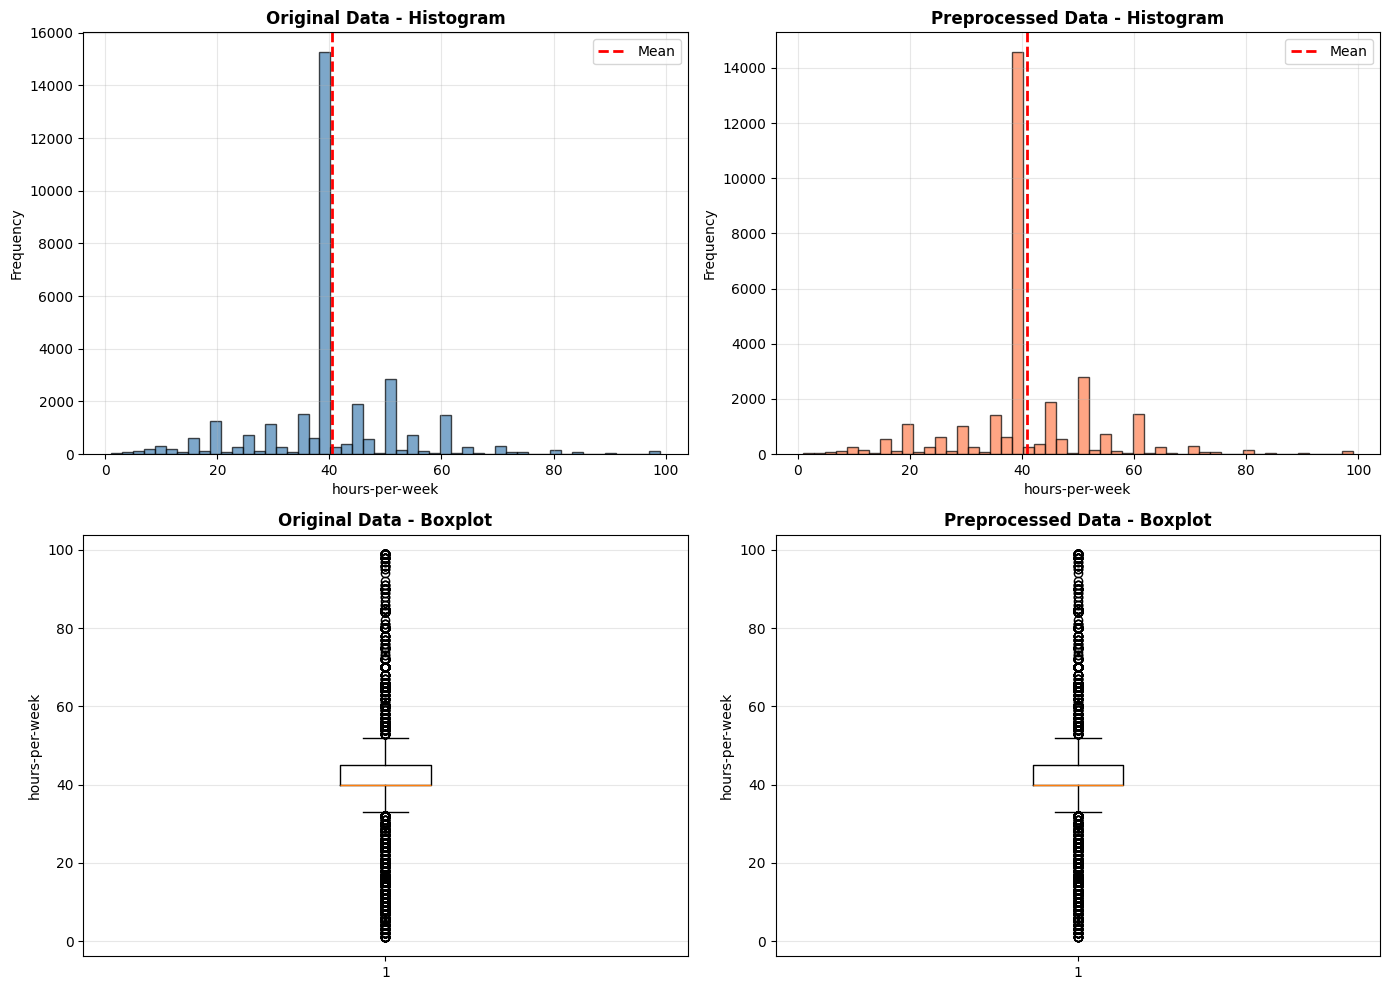

Figure saved: comparison_target_distribution.png



In [27]:
print("TARGET DISTRIBUTION VISUALIZATION")


fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Original - Histogram
axes[0, 0].hist(data[target_col].dropna(), bins=50, alpha=0.7, 
                color='steelblue', edgecolor='black')
axes[0, 0].axvline(data[target_col].mean(), color='red', 
                   linestyle='--', linewidth=2, label='Mean')
axes[0, 0].set_title('Original Data - Histogram', fontweight='bold')
axes[0, 0].set_xlabel(target_col)
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Preprocessed - Histogram
axes[0, 1].hist(prep_data[target_col].dropna(), bins=50, alpha=0.7, 
                color='coral', edgecolor='black')
axes[0, 1].axvline(prep_data[target_col].mean(), color='red', 
                   linestyle='--', linewidth=2, label='Mean')
axes[0, 1].set_title('Preprocessed Data - Histogram', fontweight='bold')
axes[0, 1].set_xlabel(target_col)
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Original - Boxplot
axes[1, 0].boxplot(data[target_col].dropna(), vert=True)
axes[1, 0].set_title('Original Data - Boxplot', fontweight='bold')
axes[1, 0].set_ylabel(target_col)
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Preprocessed - Boxplot
axes[1, 1].boxplot(prep_data[target_col].dropna(), vert=True)
axes[1, 1].set_title('Preprocessed Data - Boxplot', fontweight='bold')
axes[1, 1].set_ylabel(target_col)
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('comparison_target_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("Figure saved: comparison_target_distribution.png")
print()

In [28]:
print("MISSING VALUES")


# Original missing (replace '?' with NaN)
original_missing = data.replace('?', np.nan).isnull().sum().sum()
prep_missing = prep_data.isnull().sum().sum()

print(f"Missing values:")
print(f"  Original:     {original_missing:,}")
print(f"  Preprocessed: {prep_missing:,}")
print()

if prep_missing == 0:
    print("Fara missing values.")
else:
    print(f"Warning: {prep_missing} missing values still present in preprocessed data.")
print()

MISSING VALUES
Missing values:
  Original:     4,262
  Preprocessed: 0

Fara missing values.



In [29]:
print("FEATURE TYPES")


original_numeric = len(data.select_dtypes(include=[np.number]).columns)
original_categoric = len(data.select_dtypes(include=['object']).columns)

print(f"Original data:")
print(f"  Numeric columns:     {original_numeric}")
print(f"  Categorical columns: {original_categoric}")
print(f"  Total columns:       {data.shape[1]}")
print()

print(f"Preprocessed data:")
print(f"  All columns numeric: {prep_data.shape[1]}")
print()

FEATURE TYPES
Original data:
  Numeric columns:     6
  Categorical columns: 9
  Total columns:       15

Preprocessed data:
  All columns numeric: 44



SAMPLE FEATURES DISTRIBUTION
Showing distribution for first 3 features: ['net_capital', 'age_group', 'education_level']



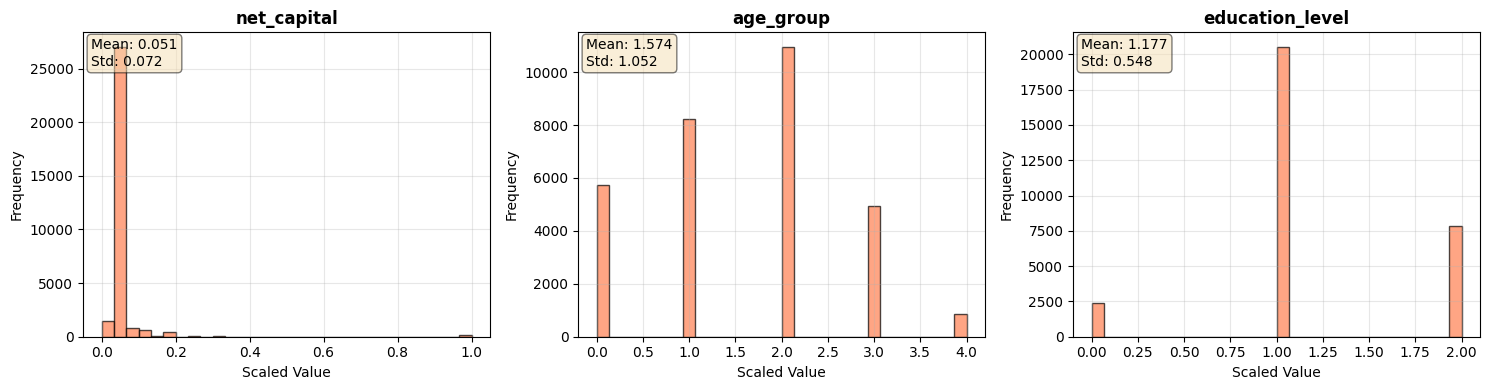

Figure saved: preprocessed_features_distribution.png



In [30]:

print("SAMPLE FEATURES DISTRIBUTION")


# Get first 3 numeric features from preprocessed (excluding target)
prep_features = [col for col in prep_data.columns if col != target_col][:3]

print(f"Showing distribution for first 3 features: {prep_features}")
print()

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for idx, col in enumerate(prep_features):
    axes[idx].hist(prep_data[col].dropna(), bins=30, alpha=0.7, 
                   color='coral', edgecolor='black')
    axes[idx].set_title(f'{col}', fontweight='bold')
    axes[idx].set_xlabel('Scaled Value')
    axes[idx].set_ylabel('Frequency')
    axes[idx].grid(True, alpha=0.3)
    
    mean_val = prep_data[col].mean()
    std_val = prep_data[col].std()
    axes[idx].text(0.02, 0.98, f'Mean: {mean_val:.3f}\nStd: {std_val:.3f}',
                   transform=axes[idx].transAxes, verticalalignment='top',
                   bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.savefig('preprocessed_features_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("Figure saved: preprocessed_features_distribution.png")
print()

CORRELATION WITH TARGET
Top correlations with target (from first 10 features):
education_level    0.138209
age_group          0.130168
net_capital        0.076383



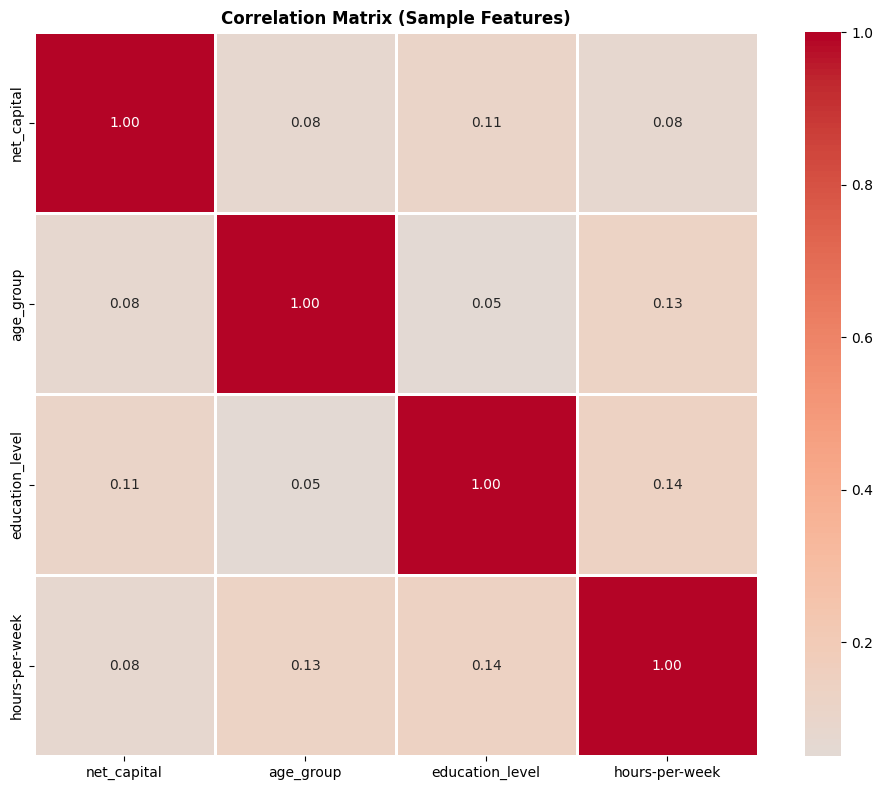

Figure saved: preprocessed_correlation_matrix.png



In [ ]:
print("CORRELATION WITH TARGET")


# Select first 10 features + target for correlation analysis
sample_cols = prep_features[:10] + [target_col]
corr_with_target = prep_data[sample_cols].corr()[target_col].drop(target_col).sort_values(ascending=False)

print("Top correlations with target (from first 10 features):")
print(corr_with_target.to_string())
print()

# Heatmap for sample
fig, ax = plt.subplots(figsize=(10, 8))
corr_matrix = prep_data[sample_cols].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, ax=ax)
ax.set_title('Correlation Matrix (Sample Features)', fontweight='bold', fontsize=12)
plt.tight_layout()
plt.savefig('preprocessed_correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print("Figure saved: preprocessed_correlation_matrix.png")
print()

# SUMMARY RAPORT FINAL (DATE ORGINALE VS DATE PREPROCESATE)

### CONCLUZII DATE ORIGINALE

### Target distribution – concentrata in jurul normei de 40h, skewness 0.21 – aproape simetrica. Outlierii reprezinta aprox. 25% din date – prea multi pentru a-i elimina. Pot reprezenta joburile part-time sau munca peste program. Distributie ok la target pentru regresie liniara.
### Descriptive statistics pentru variabile continue: am identificat asimetrie puternica pentru capital-loss si capital-gain, probabil pentru ca majoritatea oamenilor nu au castiguri sau pierderi de capital semnificative – amandoua tind spre 0 (mediana = 0). In cazul variabilei age, media de varsta aprox. 39 de ani, populatie dominata de adulti tineri si de varsta medie, distributie relativ echilibrata, valorile extreme (60-90 de ani) pot influenta media. Pentru variabila education-num, media este de 10, ceea ce inseamna ca majoritatea indivizilor au educatie mai degraba medie, distributie relativ simetrica.
### Missing values: occupation si workclass au aproximativ 5% missing values, iar native-country 2%. Pot fi sterse, impreuna nu cumuleaza un procent semnificativ din date.
### Outliers: age (0.44%, procent foarte mic), education-num (3.68%), capital-gain (8.33%), capital-loss (4.67%), hours-per-week (27.66%). Desi anumite valori sunt mari, decid sa pastrez outlierii, pentru ca reprezinta o fluctuatie reala in date. Pot face transformari logaritmice. 
### Frequency distributions pentru variabile categorice: workclass - distributie foarte imbalansata, clasa Private acopera 69.7% (putem avea risc de overfitting, pentru ca modelul va invata majoritar pattern-urile pentru angajatii privati). In cazul variabilei education - distributie relativ echilibrata, dar sunt 16 clase, ceea ce inseamna multe features. In task-ul 1 am ales sa inlocuiesc acest feature cu unul nou rezultat din education-num, din care a rezultat o variabila categorica (low-medium-high). Marital-status are o distributie relativ echilibrata, cei casatoriti reprezinta 46%.
### Corelatii: cea mai puternica corelatie identificata intre feature-uri si target (hours-per-week) este cu education-num (0.148), desi puterea ei este mai degraba slaba. Cea mai slaba corelatie identificata este cu capital loss (0.054), relatia este aproape inexistenta. Astfel, relatiile intre feature-urile numerice si target sunt non-liniare, dar cel mai probabil variabilele categorice (ca workclass) vor explica mult mai bine orele lucrate pe saptamana. 
### Observatii boxplot variabile categorice: cei mai puternici predictori pentru hours-per-week: Occupation (aprox. 30h diferenta, top ore lucrate: Exec-managerial, Prof-specialty si Farming-fishing - ajung undeva la 50h), Workclass (aprox 20h diferenta, cel mai mare numar de ore lucrate - antreprenori - ajunge undeva la 50h) si Education (diferenta 18-20h, top ore lucrate Prof-School, Doctorate, Masters - ajung undeva la 45 de ore lucrate). Impact moderat: Marital-status si relationship (diferenta de cca. 10h) -> cei casatoriti/cu familie - tind sa lucreze mai multe ore. Impact slab/inexistent: race, sex, native-country, income. Concluzie: Ma gandesc sa elimin din model variabilele cu impact slab. De exemplu, native-country are foarte multe clase, ceea ce ar majora dimensionalitatea modelului; in plus, are un impact mai degraba slab asupra target-ului hours-per-week. Sex si income au doar 2 clase, deci poate ca le-as pastra ca sa experimentez.


### CONCLUZII DATE PREPROCESATE

### Dupa preprocesare, targetul (hours-per-week) a ramas neschimbat. Anomalia identificata in distributia hours-per-week este faptul ca majoritatea observatiilor reprezinta 40h (Mean=Median=40), ceea ce este normal avand in vedere faptul ca majoritatea oamenilor lucreaza 8h in fiecare zi a saptamanii. Outlieri 25% si non-normalitate clara.
### Variabila net_capital, creata din capital_gain si capital_loss nu performeaza mai bine, corelatie cu target 0.8, spike masiv la valoarea 0. Aici pot lua in considerare crearea unei variabile binare (has_capital 0/1) pentru a sustine modelul de regresie liniara.
### In cazul variabilei age_group, distributia este aproape normala, insa corelatia este slaba in raport cu targetul (0.13). 
### Education_level este cel mai bun feature, desi nu este suficient singur. Are cea mai mare corelatie cu targetul (0.14), la fel ca variabila education-num din datele originale, dar relatia ramane slaba.
### Features-urile numerice nu pot explica variatia targetului, cel mai probabil nu va functiona foarte bine regresia liniara (va avea o performanta decenta), asumptia de normalitate este clar incalcata.  
